In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
import tensorflow as tf

plt.set_cmap('binary')
np.set_printoptions(
    infstr='inf',
    nanstr='nan',
    formatter=None,
    precision=2,    # 精度，保留小数点后几位
    threshold=1000,
    # 最多可现实的Array元素个数
    # 限制的是基本元素个数，如3*5的矩阵，限制的是15而非3（行）
    # 如果超过就采用缩略显示
    edgeitems=4,
    # 在缩率显示时在起始和默认显示的元素个数
    linewidth=150,  # 每行最多显示的字符数，默认80，超过则换行显示
    suppress=True   # 浮点显示（不用科学计数法）
)

<Figure size 432x288 with 0 Axes>

In [2]:
image = np.load("./image.npy")[0]
boxes = np.load("./boxes.npy")[0] / np.array([[720., 1280., 720., 1280.]])
image_all_mask = np.load("./image_all_mask.npy")
image_all_mask2 = cv2.resize(image_all_mask, (1280, 720))[:, :, np.newaxis]
image_boxes = 0.3*image+0.7*image_all_mask2

In [3]:
person_all_mask = np.load("./person_feat_all_mask.npy")
person_self_mask = np.load("./person_feat_self_mask.npy")
other_box_mask  = person_all_mask - person_self_mask
other_box_mask = np.where(other_box_mask<0.99, 0.0, 1.0)  # 表明别人头盔的位置

In [4]:
coord = np.load("./final_coord.npy")
weight = np.load("./final_weight.npy")

In [5]:
average_size = 20 / 960
cx = (boxes[:, 1] + boxes[:, 3]) / 2
cy = (boxes[:, 0] + boxes[:, 2]) / 2
ts = (cy - average_size*1.5)   # 该图片所有框的mid_y - met_size * 1.5
ls = (cx - average_size*1.5)  # 该图片所有框的mid_x - met_size * 1.5
bs = (cy + average_size*3)   # 该图片所有框的mid_y + met_size * 3
rs = (cx + average_size*1.5)  # 该图片所有框的mid_x + met_size * 1.5
lboxes = np.stack([ts, ls, bs, rs], axis=1)

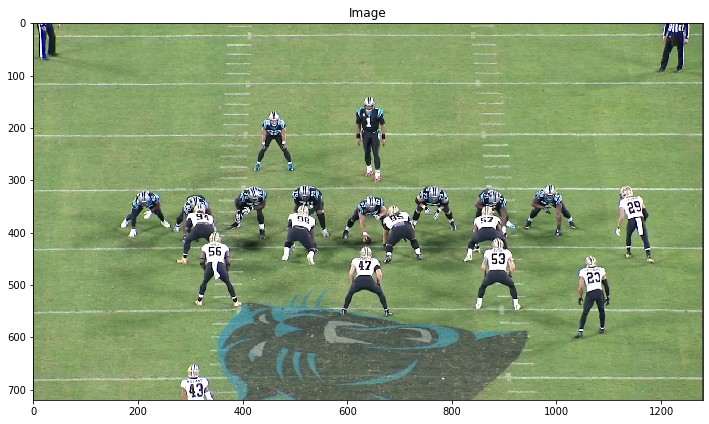

In [14]:
plt.figure(figsize=(12, 9))
plt.title("Image")
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


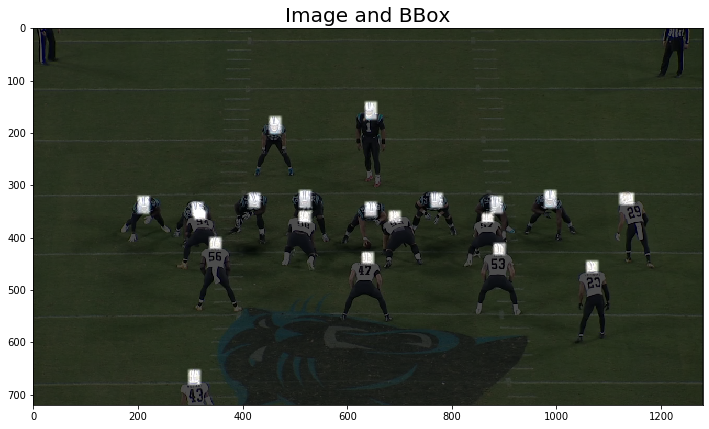

In [17]:
plt.figure(figsize=(12, 9))
plt.title("Image and BBox", size=20)
plt.imshow(image_boxes)

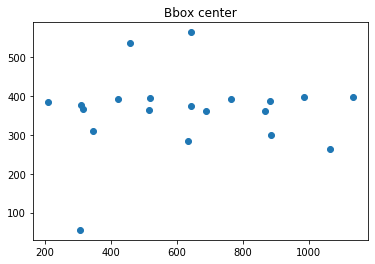

In [16]:
b = np.load("./boxes.npy")[0]
bx = (b[:, 1] + b[:, 3]) / 2
by = 720 - (b[:, 0] + b[:, 2]) / 2
plt.title("Bbox center")
plt.scatter(bx, by)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Other helmets position mask')

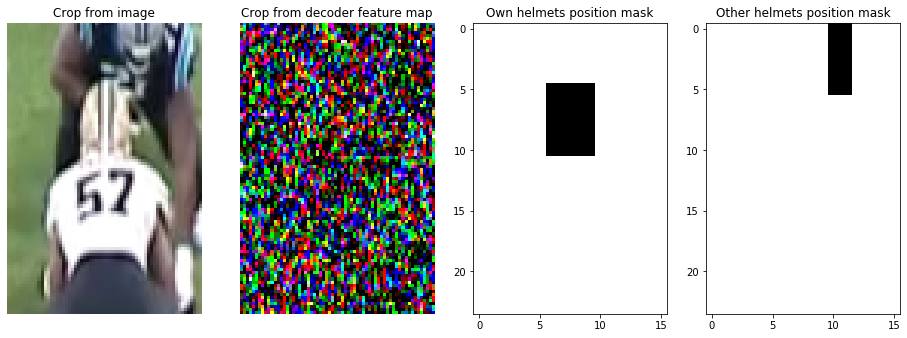

In [18]:
i = 4
fig, ax = plt.subplots(1, 4, figsize=(16, 16))
crop_img1 = tf.image.crop_and_resize(image[np.newaxis], lboxes[i:i+1], [0], (96, 64), method='bilinear').numpy()[0]
ax[0].imshow(crop_img1)
ax[0].set_title("Crop from image")
ax[0].axis('off')
crop_img2 = tf.image.crop_and_resize(np.random.randn(*image_boxes.shape)[np.newaxis], lboxes[i:i+1], [0], (96, 64), method='bilinear').numpy()[0]
ax[1].imshow(crop_img2)
ax[1].set_title("Crop from decoder feature map")
ax[1].axis('off')
ax[2].imshow(person_self_mask[i])
ax[2].set_title("Own helmets position mask")
ax[3].imshow(other_box_mask[i])
ax[3].set_title("Other helmets position mask")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Other helmets position mask')

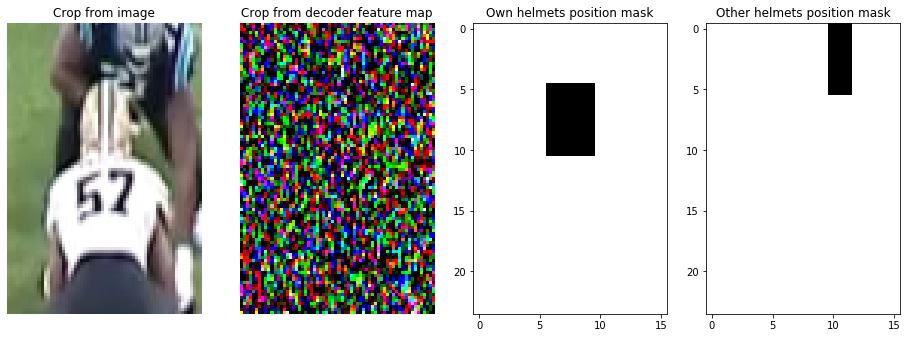

In [8]:
i = 4
fig, ax = plt.subplots(1, 2, figsize=(16, 16))
crop_img2 = tf.image.crop_and_resize(np.random.randn(*image_boxes.shape)[np.newaxis], lboxes[i:i+1], [0], (96, 64), method='bilinear').numpy()[0]
ax[0].imshow(crop_img2)
ax[0].set_title("Crop from decoder feature map")
ax[0].axis('off')
ax[2].imshow(person_self_mask[i])
ax[2].set_title("Own helmets position mask")
ax[3].imshow(other_box_mask[i])
ax[3].set_title("Other helmets position mask")

Text(0.5, 1.0, 'Weight Matrix')

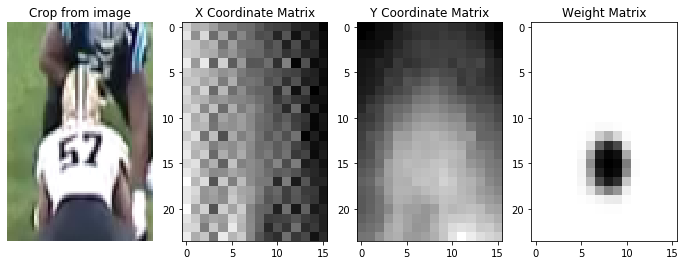

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(12, 12))
ax[0].imshow(crop_img1)
ax[0].set_title("Crop from image")
ax[0].axis('off')
ax[1].imshow(coord[i, :, :, 0])
ax[1].set_title("X Coordinate Matrix")
ax[2].imshow(coord[i, :, :, 1])
ax[2].set_title("Y Coordinate Matrix")
ax[3].imshow(weight[i, :, :, 0])
ax[3].set_title("Weight Matrix")